In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('student-mat.csv', sep=";")

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### Col definations
* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)

### Grades
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

In [10]:
numerical_cols = ['age', 'absences', 'g1', 'g2']

binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 
               'nursery', 'higher', 'internet', 'romantic', ]

ordinal_cols =['famrel', 'freetime', 'goout', 'dalc', 'walc', 
               'health', 'failures', 'traveltime', 
               'studytime', 'medu', 'fedu']

categorical_cols = ['school', 'sex', 'address', 'pstatus', 'mjob', 
                    'fjob', 'reason', 'guardian', 'famsize']

y_col = 'g3'

### Common function

In [11]:
def generalize_inplace(cols):
    for col in cols:
        df[col] = df[col].str.replace(" ", "_").str.lower()

In [12]:
def list_uniques(cols):
    for col in cols:
        print(col)
        col_list= df[col].unique().tolist()
        col_list.sort()
        print(col_list)
        print()

### Numerical data analysis

In [13]:
df[numerical_cols].describe()

,age,absences,g1,g2
count,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.908861,10.713924
std,1.276043,8.003096,3.319195,3.761505
min,15.000000,0.000000,3.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000
50%,17.000000,4.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000
max,22.000000,75.000000,19.000000,19.000000


In [14]:
df[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       395 non-null    int64
 1   absences  395 non-null    int64
 2   g1        395 non-null    int64
 3   g2        395 non-null    int64
dtypes: int64(4)
memory usage: 12.5 KB


<Axes: xlabel='absences', ylabel='Count'>

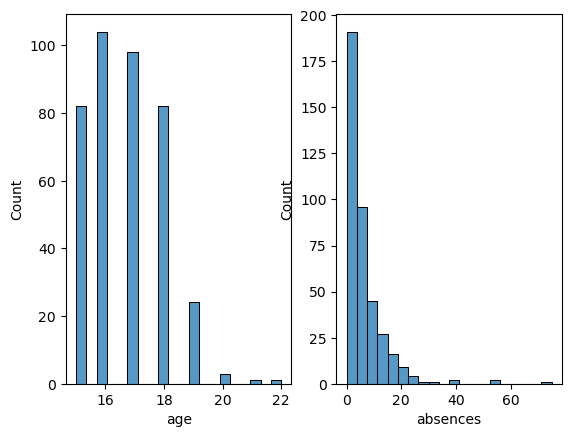

In [15]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(df.age, bins=20, ax=axs[0])
sns.histplot(df.absences, bins=20, ax=axs[1])

<Axes: xlabel='g2', ylabel='Count'>

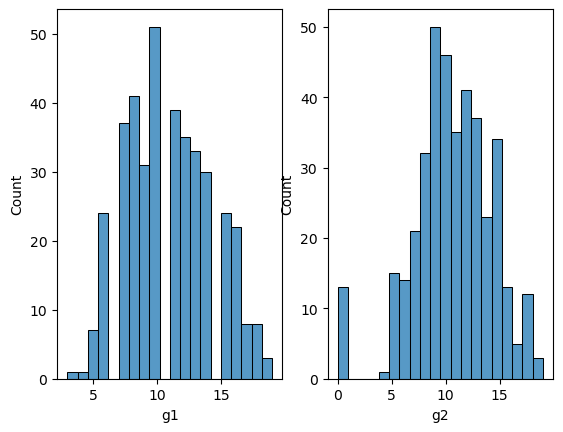

In [16]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(df.g1, bins=20, ax=axs[0])
sns.histplot(df.g2, bins=20, ax=axs[1])

### Binary feature analysis

In [17]:
df[binary_cols].head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [18]:
df[binary_cols].isna().sum()

schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64

In [19]:
generalize_inplace(binary_cols)

In [20]:
df[binary_cols].nunique()

schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [21]:
list_uniques(binary_cols)

schoolsup
['no', 'yes']

famsup
['no', 'yes']

paid
['no', 'yes']

activities
['no', 'yes']

nursery
['no', 'yes']

higher
['no', 'yes']

internet
['no', 'yes']

romantic
['no', 'yes']



### Ordinal feature analysis

In [22]:
df[ordinal_cols].head()

,famrel,freetime,goout,dalc,walc,health,failures,traveltime,studytime,medu,fedu
0,4,3,4,1,1,3,0,2,2,4,4
1,5,3,3,1,1,3,0,1,2,1,1
2,4,3,2,2,3,3,3,1,2,1,1
3,3,2,2,1,1,5,0,1,3,4,2
4,4,3,2,1,2,5,0,1,2,3,3


In [23]:
df[ordinal_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   famrel      395 non-null    int64
 1   freetime    395 non-null    int64
 2   goout       395 non-null    int64
 3   dalc        395 non-null    int64
 4   walc        395 non-null    int64
 5   health      395 non-null    int64
 6   failures    395 non-null    int64
 7   traveltime  395 non-null    int64
 8   studytime   395 non-null    int64
 9   medu        395 non-null    int64
 10  fedu        395 non-null    int64
dtypes: int64(11)
memory usage: 34.1 KB


In [24]:
df[ordinal_cols].isna().sum()

famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
failures      0
traveltime    0
studytime     0
medu          0
fedu          0
dtype: int64

In [25]:
generalize_inplace(["famsize"])

In [26]:
list_uniques(ordinal_cols)

famrel
[1, 2, 3, 4, 5]

freetime
[1, 2, 3, 4, 5]

goout
[1, 2, 3, 4, 5]

dalc
[1, 2, 3, 4, 5]

walc
[1, 2, 3, 4, 5]

health
[1, 2, 3, 4, 5]

failures
[0, 1, 2, 3]

traveltime
[1, 2, 3, 4]

studytime
[1, 2, 3, 4]

medu
[0, 1, 2, 3, 4]

fedu
[0, 1, 2, 3, 4]



### Categorical feature analysis

In [27]:
df[categorical_cols].head()

,school,sex,address,pstatus,mjob,fjob,reason,guardian,famsize
0,GP,F,U,A,at_home,teacher,course,mother,gt3
1,GP,F,U,T,at_home,other,course,father,gt3
2,GP,F,U,T,at_home,other,other,mother,le3
3,GP,F,U,T,health,services,home,mother,gt3
4,GP,F,U,T,other,other,home,father,gt3


In [28]:
df[categorical_cols].dtypes

school      object
sex         object
address     object
pstatus     object
mjob        object
fjob        object
reason      object
guardian    object
famsize     object
dtype: object

In [29]:
df[categorical_cols].isna().sum()

school      0
sex         0
address     0
pstatus     0
mjob        0
fjob        0
reason      0
guardian    0
famsize     0
dtype: int64

In [30]:
generalize_inplace(categorical_cols)

In [31]:
list_uniques(categorical_cols)

school
['gp', 'ms']

sex
['f', 'm']

address
['r', 'u']

pstatus
['a', 't']

mjob
['at_home', 'health', 'other', 'services', 'teacher']

fjob
['at_home', 'health', 'other', 'services', 'teacher']

reason
['course', 'home', 'other', 'reputation']

guardian
['father', 'mother', 'other']

famsize
['gt3', 'le3']



### Target variable analysis

<Axes: xlabel='g3', ylabel='Count'>

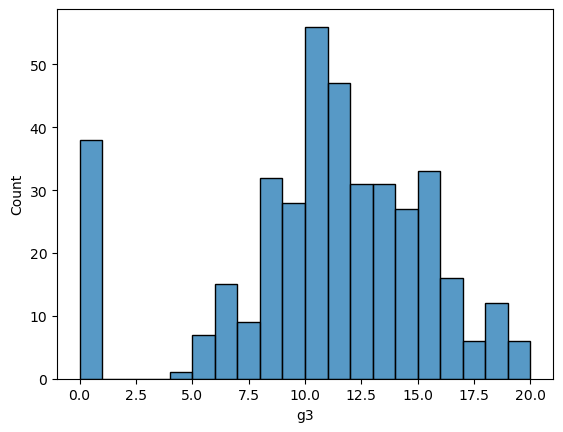

In [32]:
sns.histplot(df.g3, bins=20)

In [33]:
df[y_col].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: g3, dtype: float64

In [34]:
df[y_col].isna().sum()

0

### Data splitting

In [35]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n - n_val - n_test)
n, n_train, n_val, n_test

(395, 237, 79, 79)

In [37]:
refresh_i_rand = True
if refresh_i_rand or i_rand is None:
    i_rand = np.arange(n)
    np.random.shuffle(i_rand)

In [38]:
df_train = df.iloc[i_rand[:n_train]]
df_val = df.iloc[i_rand[n_train:n_train + n_val]]
df_test = df.iloc[i_rand[n_train + n_val:]]
print(len(df), len(df_train), len(df_val), len(df_test))

395 237 79 79


In [39]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [40]:
df_test.school.value_counts()['ms']*100/len(df_test)

11.39240506329114

In [41]:
df_val.school.value_counts()['ms']*100/len(df_val)

18.9873417721519

In [42]:
df_train.school.value_counts()['ms']*100/len(df_train)

9.282700421940929

In [43]:
df.school.value_counts()['ms']*100/len(df)

11.645569620253164

### Data preperation

In [44]:
numerical_cols = ['age', 'absences', 'g1', 'g2']

binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 
               'nursery', 'higher', 'internet', 'romantic', ]

ordinal_cols =['famrel', 'freetime', 'goout', 'dalc', 'walc', 
               'health', 'failures', 'traveltime', 
               'studytime', 'medu', 'fedu']

categorical_cols = ['school', 'sex', 'address', 'pstatus', 'mjob', 
                    'fjob', 'reason', 'guardian', 'famsize']

y_col = 'g3'

In [45]:
t = df[['school']].copy()
for val in t['school'].unique().tolist():
    t['school_' + val] = (t['school'] == val).astype('int')
t

,school,school_gp,school_ms
0,gp,1,0
1,gp,1,0
2,gp,1,0
3,gp,1,0
4,gp,1,0
...,...,...,...
390,ms,0,1
391,ms,0,1
392,ms,0,1
393,ms,0,1


In [46]:
def prepare_X(df_local: pd.DataFrame, include_binary: bool, include_ordinal: bool, include_categorical: bool):
    df_local = df_local.copy()
    X_cols = numerical_cols.copy()
    
    if include_binary:
        #print("Including binary")
        X_cols += binary_cols
        for col in binary_cols:
            df_local[col] = (df_local[col] == "yes").astype('int')
            
    if include_ordinal:
        #print("Including ordinal")
        X_cols += ordinal_cols
    
    if include_categorical:
        #print("Including categorical")
        for col in categorical_cols:
            for val in df[col].unique().tolist():
                df_local[f'{col}_{val}'] = (df_local[col] == val).astype('int')
                X_cols += [f'{col}_{val}']
                
    return df_local[y_col], df_local[X_cols]

### Model training

In [47]:
def train_linear_regression_reg(X: pd.DataFrame, y: pd.Series, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X.values])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y.values)
    
    return w[0], w[1:]

In [53]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [54]:
def train_for_rs(X_train, y_train, X_val, y_val):
    result = []
    print("Reg_val", "\t", "RMSE", "\t\t\t", "W0", "\t\t\t", "W max")
    print("------------------------------------------------------------------------------------")
    for r in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        w_0, w = train_linear_regression_reg(X_train, y_train, r)
        y_pred = w_0 + X_val.dot(w)
        print(r, "\t\t", rmse(y_val, y_pred), "\t", w_0, "\t", w.max())
        result.append((r, rmse(y_val, y_pred), w_0, w.max()))
        
    return result

In [55]:
def draw_r_vs_rmse(result: list[tuple]):
    r_s=[r[0] for r in result]
    rmse_s = [r[1] for r in result]
    sns.pointplot(x=r_s, y=rmse_s)
    plt.show()

Reg_val 	 RMSE 			 W0 			 W max
------------------------------------------------------------------------------------
0.0001 		 2.4454301986062545 	 -1.133774900184549 	 0.9564430032652598
0.001 		 2.4454095907881155 	 -1.1328826582163707 	 0.9564359950389328
0.01 		 2.44520538225044 	 -1.124036814320303 	 0.9563664408605852
0.1 		 2.4433345316432833 	 -1.042620775077043 	 0.9557194667162352
1 		 2.433548365308066 	 -0.6044864103092802 	 0.951843882597201
10 		 2.4236740580139653 	 -0.11559303250592551 	 0.9401118794539918
100 		 2.4299346301780074 	 -0.01211831076904846 	 0.8709323945338608
1000 		 2.5559654207027043 	 0.0021329261598238966 	 0.6217806197870372


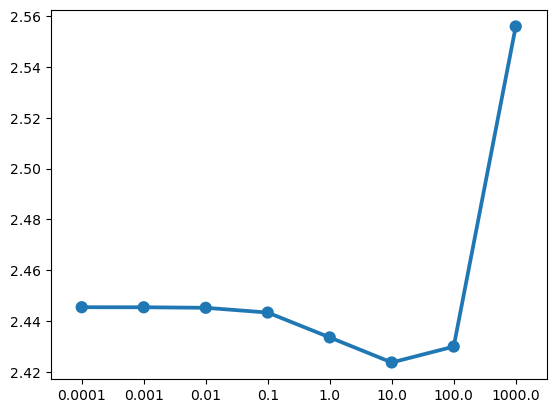

In [56]:
y_train, X_train = prepare_X(df_train, False, False, False)
y_val, X_val = prepare_X(df_val, False, False, False)
y_test, X_test = prepare_X(df_test, False, False, False)

draw_r_vs_rmse(train_for_rs(X_train, y_train, X_val, y_val))

### Include binary features

Reg_val 	 RMSE 			 W0 			 W max
------------------------------------------------------------------------------------
0.0001 		 2.477632091444419 	 -2.0222089133889893 	 0.9487758668520964
0.001 		 2.477579589638991 	 -2.0197045285412436 	 0.9487675449172721
0.01 		 2.477061778014276 	 -1.9949921359992273 	 0.9486853188094985
0.1 		 2.4725136897629514 	 -1.777067370989382 	 0.947950552652106
1 		 2.45288362134221 	 -0.8402836196457473 	 0.9443246878727029
10 		 2.4312447373646466 	 -0.12395689957864953 	 0.9340320719177398
100 		 2.427274075995905 	 -0.012745674430049599 	 0.867260053909334
1000 		 2.5550331892946208 	 0.0019831338217457 	 0.6208676638970883


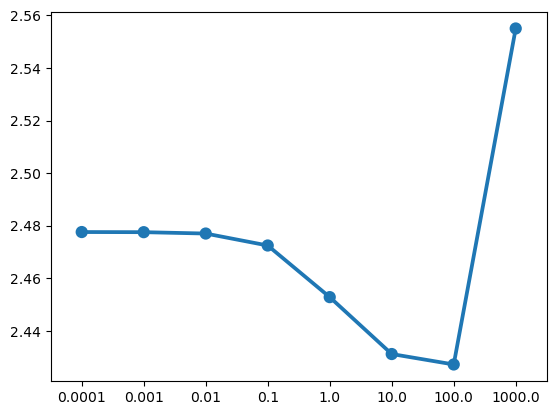

In [57]:
y_train, X_train = prepare_X(df_train, True, False, False)
y_val, X_val = prepare_X(df_val, True, False, False)
y_test, X_test = prepare_X(df_test, True, False, False)

draw_r_vs_rmse(train_for_rs(X_train, y_train, X_val, y_val))

### Include all features

Reg_val 	 RMSE 			 W0 			 W max
------------------------------------------------------------------------------------
0.0001 		 2.627077914211696 	 -0.6390761053671667 	 1.2522685798889372
0.001 		 2.627047997380555 	 -0.6395847703773825 	 1.2520325432055595
0.01 		 2.626749848086626 	 -0.6365484403736499 	 1.2496803048859682
0.1 		 2.6238666476385 	 -0.6076785102302633 	 1.226936370385482
1 		 2.6016793749201703 	 -0.4170716309128705 	 1.0535315865629136
10 		 2.519319704269876 	 -0.10558051773307944 	 0.9304076456327401
100 		 2.4334429719133133 	 -0.01775832752966155 	 0.8600472103294499
1000 		 2.5503006214287454 	 0.0007129490900667961 	 0.6134197496834396


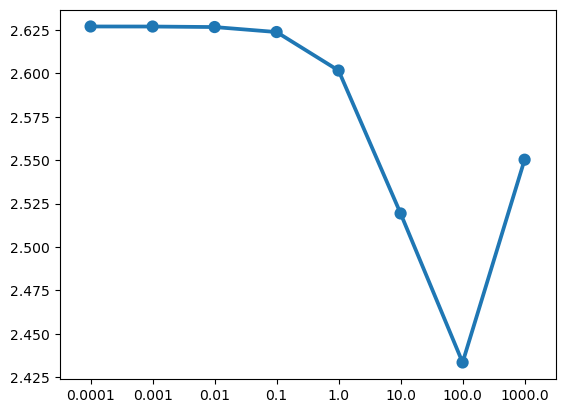

In [58]:
y_train, X_train = prepare_X(df_train, True, True, True)
y_val, X_val = prepare_X(df_val, True, True, True)
y_test, X_test = prepare_X(df_test, True, True, True)

draw_r_vs_rmse(train_for_rs(X_train, y_train, X_val, y_val))

In [59]:
r_final=100

### Full training

In [60]:
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

In [61]:
len(X_full), len(X_train), len(X_val)

(316, 237, 79)

In [62]:
w_0, w = train_linear_regression_reg(X_full, y_full, r_final)
y_pred = w_0 + X_test.dot(w)
print(r_final, "\t", rmse(y_test, y_pred), "\t", w_0, "\t", w.max())

100 	 1.9204618930253532 	 0.0021165004593277914 	 0.8809376438766542


<Axes: xlabel='g3', ylabel='Count'>

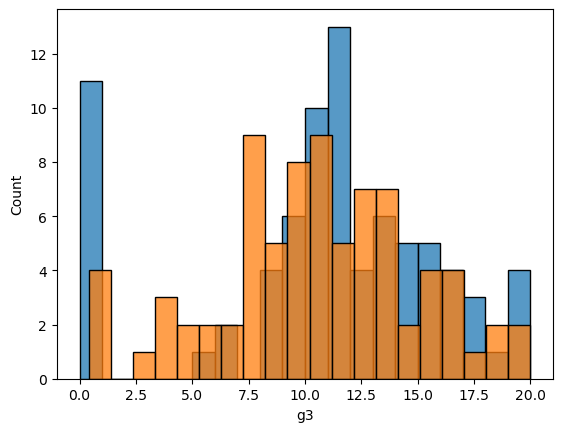

In [63]:
sns.histplot(y_test, bins=20)
sns.histplot(y_pred, bins=20)

In [64]:
df_test.iloc[[10]]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
10,gp,m,17,r,gt3,t,2,2,other,other,...,4,5,2,1,1,1,4,11,11,11


In [68]:
i = np.random.randint(len(X_test))
y_t, X_t = prepare_X(df_test.iloc[[i]], True, True, True)
i, y_t[i], w_0 + X_t.dot(w)[i]

(40, 11, 7.359593743354723)